In [1]:
import os
import numpy as np
from PIL import Image
from IPython import display

import inference
from model_inspect import ModelInspector

model_name = 'efficientdet-d1'
logdir = 'logs_infere'
hparams = 'voc_config.yaml'
ckpt_path = '/tf/ds/snapshots/efficientdet-d1-lacmus'

In [2]:
# Here we build driver from ckpt_path, so dont use saved_model
# Use ModelInspector to simplify load hparams
inspector = ModelInspector(
    model_name=model_name,
    logdir=logdir,
    hparams=hparams)

driver = inference.ServingDriver(
    model_name,
    ckpt_path,
    batch_size=1,
    model_params=inspector.model_config.as_dict()
)
driver.build()

model_name = efficientdet-d1
model_name = efficientdet-d1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
3 ops no flops stats due to incomplete shapes.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.


Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.
3 ops no flops stats due to incomplete shapes.
3 ops no flops stats due to incomplete shapes.


INFO:tensorflow:Restoring parameters from /tf/ds/snapshots/efficientdet-d1-lacmus/model.ckpt-2550


INFO:tensorflow:Restoring parameters from /tf/ds/snapshots/efficientdet-d1-lacmus/model.ckpt-2550


{'image_files': <tf.Tensor 'image_files:0' shape=(None,) dtype=string>,
 'image_arrays': <tf.Tensor 'image_arrays:0' shape=(None, None, None, None) dtype=uint8>,
 'prediction': <tf.Tensor 'detections:0' shape=(1, None, 7) dtype=float32>}

In [6]:
# Open image and conver to raw
img_path = '/tf/ds/data/LizaAlertDroneDatasetV4_Spring/JPEGImages/1010.jpg'
output_image_dir = 'image_output'

height, width = inspector.model_config.image_size
image = Image.open(img_path)
image = image.resize((height, width))
raw_image = np.array(image)
print(raw_image.shape)

(640, 640, 3)


In [4]:
%%time
detections_bs = driver.serve_images([raw_image])

CPU times: user 1.23 s, sys: 263 ms, total: 1.49 s
Wall time: 1.58 s


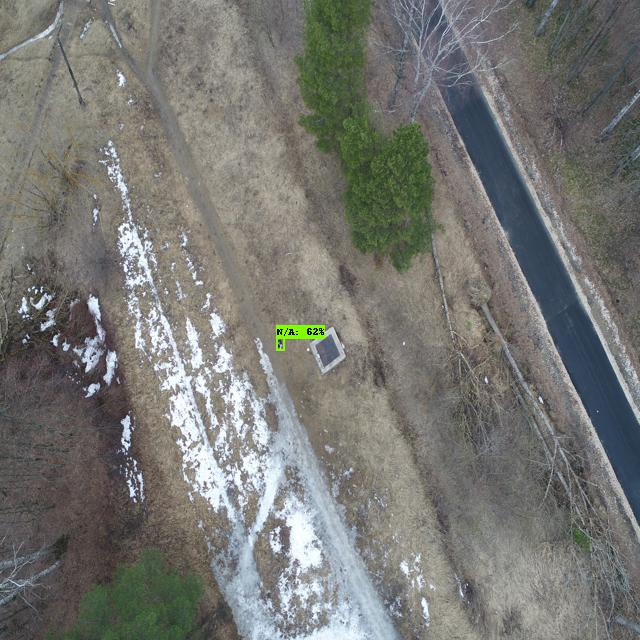

In [7]:
# Save visualisation
img = driver.visualize(raw_image, detections_bs[0])

if not os.path.isdir(output_image_dir):
    os.mkdir(output_image_dir)
    
output_image_path = os.path.join(output_image_dir, '0.jpg')
Image.fromarray(img).save(output_image_path)

display.display(display.Image(os.path.join(output_image_dir, '0.jpg')))